### K-means Clustering
 
K-means clustering is one of the simplest and most popular unsupervised machine learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This means the algorithm will find patterns in the data for us without us specifying what we want to find.
 
This method uses vector quantization that aims to partition n observations into k clusters, in which each observation belongs to the cluster with the nearest mean. The target number k refers to the number of centroids you need in the dataset. 
 
A centroid is the imaginary or real location representing the centre of the cluster. K-means algorithm defines k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
In summary to run a k-means clustering:
 
1. Specify the number of clusters you want (usually referred to as k).
2. Randomly initialize the centroid for each cluster. The centroid is the data point that is in the center of the cluster.
3. Determine which data points belong to which cluster by finding the closest centroid to each data point.
4. Update the centroids based on the geometric mean of all the data points in the cluster.
5. Run 3 and 4 until the centroids stop changing. Each run is referred to as an iteration.


### Project

The data used will be from the online video game FIFA, the dataset includes player data from FIFA 15 to FIFA 22. We will be using the data from the most recent game FIFA 22.

In [3]:
#import necessary modules
import pandas as pd
import numpy as np

player_data = pd.read_csv('players_22.csv')
player_data.head()

C:\Users\hicks\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


The file contains a lot of data that we won't be using. We will be looking to cluster five main features: overall rating, potential, wage_eur, value_eur, age.

First we will clean the data and then extract the specified features we want for clustering.

In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
# drop nan from our feature columns
player_data=player_data.dropna(subset=features)

In [6]:
# copy our wanted data into a new dataframe
data = player_data[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


#### Scaling The Data

We want to scale the data to standardized values as columns with larger values will have greater importance when clustering. Using min max scaling we set the min value in each column to zero, divide by the range to rescael everything from zero to one. Then multiply by 9 and +1 to get a range between 1 and 10. (we don't want a range between 0 and 10)

In [8]:
# min max scaling
data = (data - data.min())/(data.max() - data.min()) * 9 + 1
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


We can see our max point is 10, for the top overall ranked player.


#### Initialize Random Centroids

A centroid will be a random value for each of our features.

To attain a single centroid:

In [10]:
# apply an iteration through each column and sample a random value from each column
# call float to turn into a number
single_centroid = data.apply(lambda x: float(x.sample()))
single_centroid

overall      2.956522
potential    5.891304
wage_eur     1.965665
value_eur    1.014660
age          3.000000
dtype: float64

To attain multiple centroids:

In [11]:
# define a function
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1) # combine all individual panda series

In [12]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,3.152174,5.500000,4.521739,5.500000,4.913043
potential,5.695652,4.913043,4.521739,4.521739,5.695652
wage_eur,1.038627,1.000000,1.090129,1.038627,1.012876
value_eur,1.055255,1.254749,1.036698,1.037857,1.023939
age,5.000000,5.333333,2.666667,3.000000,1.666667


#### Finding Cluster Labels

Write a function that labels each data point according to the cluster centres. 

Look at each data point (player) and find euclidean distance between that point and each cluster centre then assign a label to it based on the data points closest cluster centre.

Euclidean distance between two points in Euclidean space is the length of a line segment between the two points.

In [13]:
# calculating the distance
distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
# find index of min value in each row
distances.idxmin(axis=1)

0        1
1        1
2        1
3        1
4        1
        ..
19234    2
19235    2
19236    2
19237    2
19238    2
Length: 19165, dtype: int64

In [14]:
distances

,0,1,2,3,4
0,12.081270,11.139196,12.398002,11.916538,12.248775
1,11.730238,10.766259,11.938232,11.467561,11.746180
2,10.628144,9.611135,11.137811,10.608314,11.076694
3,11.703970,10.788886,11.718876,11.285569,11.463296
4,12.965166,12.145550,13.030043,12.641375,12.838922
...,...,...,...,...,...
19234,5.051400,6.068025,4.597154,5.372601,5.828509
19235,4.597688,5.937307,3.912307,4.868521,4.788151
19236,4.741628,5.909882,4.233688,5.086848,5.358648
19237,4.483880,5.875739,3.838222,4.809189,4.678978


In [15]:
# wrapping into one function
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1))) # find distance
    return distances.idxmin(axis=1) # find cluster assignment

In [16]:
labels = get_labels(data, centroids)
labels

0        1
1        1
2        1
3        1
4        1
        ..
19234    2
19235    2
19236    2
19237    2
19238    2
Length: 19165, dtype: int64

In [17]:
labels.value_counts() #number of times each cluster is labelled

1    8300
2    5380
4    3701
3    1339
0     445
dtype: int64

#### Update Centroids

Find all players in a cluster, take geometric mean of each feature which is the mean of points in euclidean space. Giving us the centre of each cluster.

Multiply each point, take nth root based on number of points we are going to calculate
Instead of multiplying large numbers we will condense the numbers to avoid long calcultion
time and memory storage.

In [22]:
# split data by labels
# for each group apply geometric mean
# transpose so each column is a centroid and each row is now a feature
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

#### Plotting K-means Iterations

Writing a function to plot each iteration in the algorithm.

In [23]:
from sklearn.decomposition import PCA
#PCA helps to turn our five dimensional data into two dimensional data
import matplotlib.pyplot as plt
from IPython.display import clear_output
# clear cell output to make a new graph

In [24]:
def plot_clusters(data, labels, centroids, iteration):
    # want to only return two columns
    pca = PCA(n_components=2) 
    # run model on our data
    data_2d = pca.fit_transform(data) 
    # pca model expects col as features so .T to switch 
    centroids_2d = pca.transform(centroids.T) 
    # display a new graph
    clear_output(wait=True) 
    # display current iteration
    plt.title(f'Iteration {iteration}') 
    # 1st component on x, 2nd component on y, colour accord to label
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels) 
    # plot centroids over the top 
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

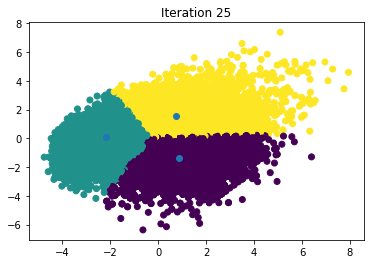

In [25]:
max_iterations = 100
centroid_count = 3 # number of clusters

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

# stop loop when max iterations is hit or centroids are equal to old centroids
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids) # cqll our label generation function
    centroids = new_centroids(data, labels, centroid_count) # update centroid values based on geometric mean
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [29]:
centroids

,0,1,2
overall,4.784633,3.206838,5.806043
potential,4.506962,4.928473,6.497993
wage_eur,1.118904,1.028505,1.420001
value_eur,1.044980,1.026614,1.285501
age,5.472247,2.518708,3.596161


In [30]:
labels.value_counts()

0    7173
1    6223
2    5769
dtype: int64

In [32]:
player_data[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


#### Comparing to Sci-kit learn

We can compare our implementation to scikit learn.

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(3) # specify three centroids
kmeans.fit(data)

KMeans(n_clusters=3)

In [34]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,3.595615,6.226522,4.800907
potential,5.204910,6.620672,4.504650
wage_eur,1.039763,1.655000,1.112956
value_eur,1.035675,1.412500,1.040035
age,2.709020,4.137516,5.607221


Using the sci-kit learn tool is much faster than building our own algorithm. Building an algorithm from scratch does give more flexibility and power into exactly what you're investigating however it is more time consuming.

#### Interpreting Clusters

Interpreting the clusters relies on how we charachterize our clusters, using a parallel coordinate plot allows us to more clearly see what the clusters mean

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(data, color = "species_id",
                              dimensions = features,
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

#### References

[1]  dataquest.io